In [11]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display, stanford_mir
plt.rcParams['figure.figsize'] = (14,5)

[&larr; Back to Index](index.html)

# K-Nearest Neighbor

We can appreciate why we need additional intelligence in our systems -- heuristics don't go very far in the world of complex audio signals.  We'll be using scikit-learn's implementation of the k-NN algorithm for our work here.  It proves be a straightforward and easy-to-use implementation.  The steps and skills of working with one classifier will scale nicely to working with other, more complex classifiers.

## Training Data

Let's begin by loading some training data. We will use the following convenience function written for this workshop:

In [5]:
training_features, training_labels, scaler = stanford_mir.get_features(collection="drum_samples_train", download=False)

This function returns three outputs: a list of training feature vectors, each containing zero crossing rate and spectral centroid; the ground truth labels of the training data; and a `scaler` object of type [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). `scaler` simply scales every training feature vector such that the two features lie between -1 and 1.

Show the training labels. `0` is a kick drum, and `1` is a snare drum.

In [6]:
print training_labels

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


Show the training feature vectors.

In [8]:
print training_features

[[-0.56578947  0.2490469 ]
 [-0.92105263 -0.63084112]
 [-1.         -1.        ]
 [-1.          0.32776395]
 [-0.77631579 -0.55766302]
 [-0.96052632 -0.69890631]
 [-0.68421053 -0.6353643 ]
 [-0.73684211 -0.10209073]
 [-0.82894737 -0.38692759]
 [-0.69736842 -0.5365142 ]
 [ 0.53947368  0.89837486]
 [ 0.63157895  0.55248334]
 [ 1.          0.99378504]
 [ 0.93421053  1.        ]
 [ 0.85526316  0.87391641]
 [ 0.89473684  0.96797404]
 [ 0.23684211  0.86119147]
 [ 0.97368421  0.79526304]
 [ 0.40789474  0.38793404]
 [ 0.88157895  0.88600432]]


Plot the training data:

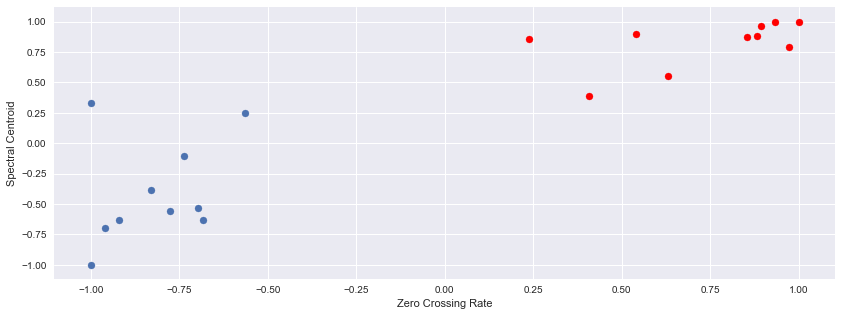

In [9]:
plt.scatter(training_features[:10,0], training_features[:10,1])
plt.scatter(training_features[10:,0], training_features[10:,1], color='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

## Test Data

Compute features from a test data set of 30 kick drum samples and 30 snare drum samples. We will re-use the `MinMaxScaler` used during training.

In [14]:
test_features, test_labels, _ = stanford_mir.get_features(collection="drum_samples_test", scaler=scaler, download=True)

Let's see how many test examples were loaded:

In [15]:
print test_features.shape

(60, 2)


Show the test labels:

In [16]:
print test_labels

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


Plot the test feature vectors. Note that this uses the same scaling function used during training. Therefore, some test feature vectors may exceed the range [-1, 1].

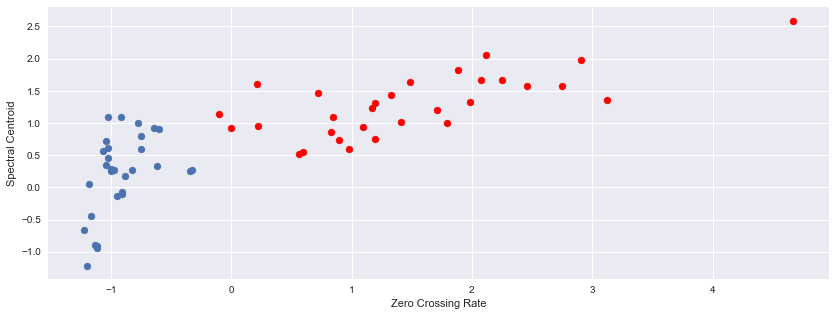

In [17]:
plt.scatter(test_features[test_labels==0,0], test_features[test_labels==0,1])
plt.scatter(test_features[test_labels==1,0], test_features[test_labels==1,1], color='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

## Building the K-NN Model

Build a k-NN model for the snare drums using scikit.learn's [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class.

In [18]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)

To train a scikit-learn classifier, use the classifier object's `fit` method:

In [19]:
model.fit(training_features, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

To test the classifier on a set of (test) feature vectors, use the `predict` method:

In [20]:
predicted_labels = model.predict(test_features)

In [21]:
predicted_labels

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## Evaluating the model

Compute the number of true positives, true negatives, false positives, and false negatives:

In [22]:
tp = sum((test_labels == 1) & (predicted_labels == 1))
tn = sum((test_labels == 0) & (predicted_labels == 0))
fp = sum((test_labels == 0) & (predicted_labels == 1))
fn = sum((test_labels == 1) & (predicted_labels == 0))

In [23]:
print tp, tn, fp, fn

30 30 0 0


Evaluate the model accuracy on the test data.

In [24]:
model.score(test_features, test_labels)

1.0

Compute the recall score, and verify it is correct:

In [25]:
sklearn.metrics.recall_score(test_labels, predicted_labels)

1.0

In [26]:
recall = tp/float(tp+fn)
print recall

1.0


Compute the precision score, and verify:

In [27]:
sklearn.metrics.precision_score(test_labels, predicted_labels)

1.0

In [28]:
precision = tp/float(tp+fp)
print precision

1.0


Compute the [F-measure](https://en.wikipedia.org/wiki/F1_score), and verify:

In [29]:
sklearn.metrics.f1_score(test_labels, predicted_labels)

1.0

In [30]:
fmeasure = 2*recall*precision/float(recall+precision)
print fmeasure

1.0


### Bonus

Substitute the k-NN model with a different classifer, and repeat the above classification. For example:

In [23]:
#model = sklearn.svm.SVC()

[&larr; Back to Index](index.html)